In [24]:
import sys
from pathlib import Path


project_root = str(Path.cwd())

if project_root not in sys.path:
    sys.path.append(project_root)


from dados_analise_duck import rodar_benchmark_duckdb
from dados_analise_mongo import rodar_benchmark_mongo
# DB_PATH = "duck/duck_users.db"
DB_PATH = 'duck_users.db'


In [25]:
df_duck = rodar_benchmark_duckdb(10)


Iniciando benchmark do DuckDB com 10 repetições para cada teste...
 -> Rodada 1/10
Conexão com c:\Users\Public\Documents\Projetos\My_benchmark_duckDB_vs_mongoDB\duck\duck_users.db realizada com sucesso!
   -> Consulta OLAP no DuckDB concluída.
Finalizando conexão
--------------------------------------------------
Conexão com c:\Users\Public\Documents\Projetos\My_benchmark_duckDB_vs_mongoDB\duck\duck_users.db realizada com sucesso!
   -> Consulta OLAP no DuckDB concluída.
Finalizando conexão
--------------------------------------------------
Conexão com c:\Users\Public\Documents\Projetos\My_benchmark_duckDB_vs_mongoDB\duck\duck_users.db realizada com sucesso!
   -> Consulta OLAP no DuckDB concluída.
Finalizando conexão
--------------------------------------------------
Conexão com c:\Users\Public\Documents\Projetos\My_benchmark_duckDB_vs_mongoDB\duck\duck_users.db realizada com sucesso!
   -> Consulta OLAP no DuckDB concluída.
Finalizando conexão
----------------------------------------

In [26]:
df_duck

,Analise_Temporal,Performance_Categorias,Ranking_Clientes_RFV,Produto_Por_Estado
0,0.0200,0.0138,0.0240,0.0290
1,0.0134,0.0134,0.0214,0.0285
2,0.0135,0.0157,0.0253,0.0295
3,0.0132,0.0137,0.0208,0.0250
4,0.0125,0.0131,0.0204,0.0259
5,0.0127,0.0127,0.0215,0.0300
6,0.0143,0.0149,0.0219,0.0274
7,0.0142,0.0140,0.0223,0.0272
8,0.0136,0.0129,0.0213,0.0265
9,0.0135,0.0173,0.0221,0.0327


In [27]:
df_mongo = rodar_benchmark_mongo(10)


Iniciando benchmark com 10 repetições para cada teste...
 -> Rodada 1/10
 -> Rodada 2/10
 -> Rodada 3/10
 -> Rodada 4/10
 -> Rodada 5/10
 -> Rodada 6/10
 -> Rodada 7/10
 -> Rodada 8/10
 -> Rodada 9/10
 -> Rodada 10/10

Benchmark concluído!


In [28]:
df_mongo

,Analise_Temporal,Performance_Categorias,Ranking_Clientes_RFV,Produto_Por_Estado
0,0.8166,4.8759,5.5569,5.1781
1,0.7350,5.9187,5.7021,5.1691
2,0.7254,4.9615,5.6514,5.0355
3,0.6791,5.7307,5.5198,5.1487
4,0.6889,5.5479,5.7968,5.4730
5,0.6712,5.0173,5.8312,5.1867
6,0.6549,5.1000,5.9602,5.0857
7,0.6827,5.0938,5.7680,5.1070
8,0.6856,4.7637,5.8768,5.1256
9,0.7128,4.8398,6.6655,5.2583


# Graficos

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
avg_duck = df_duck.mean()
avg_mongo = df_mongo.mean()

print(f"Media para o DUCKDB")
print(f"Media: {avg_duck}")

print(50*"-")
print(f"Media para o MONGODB")
print(f"Media: {avg_mongo}")

Media para o DUCKDB
Media: Analise_Temporal          0.01409
Performance_Categorias    0.01415
Ranking_Clientes_RFV      0.02210
Produto_Por_Estado        0.02817
dtype: float64
--------------------------------------------------
Media para o MONGODB
Media: Analise_Temporal          0.70522
Performance_Categorias    5.18493
Ranking_Clientes_RFV      5.83287
Produto_Por_Estado        5.17677
dtype: float64


## SpeedUp

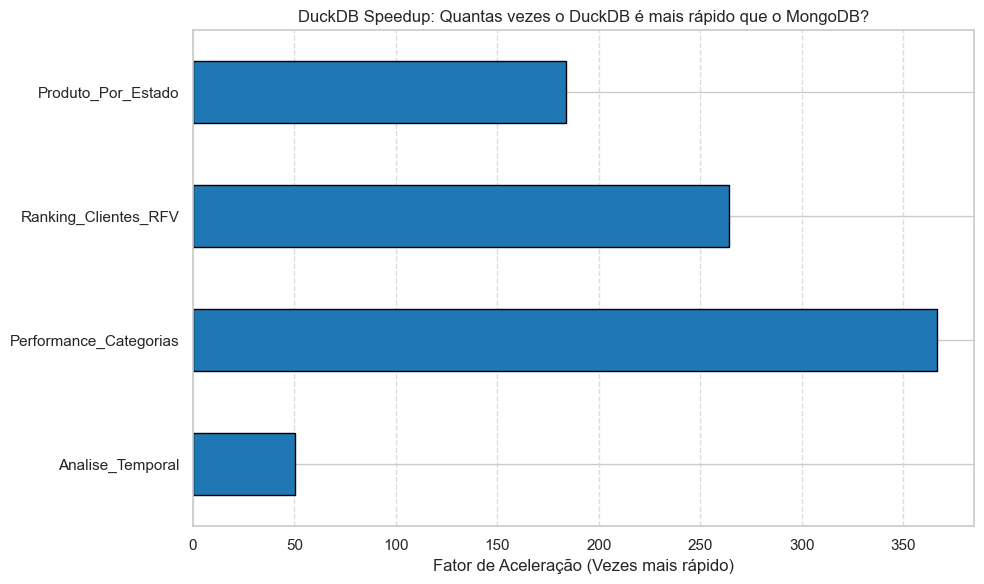

In [31]:
speedup = avg_mongo / avg_duck

plt.figure(figsize=(10, 6))

speedup.plot(kind='barh', color='#1f77b4', edgecolor='black')
plt.xlabel('Fator de Aceleração (Vezes mais rápido)')
plt.title('DuckDB Speedup: Quantas vezes o DuckDB é mais rápido que o MongoDB?')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

## Linha

In [32]:
df_duck.describe()

,Analise_Temporal,Performance_Categorias,Ranking_Clientes_RFV,Produto_Por_Estado
count,10.000000,10.000000,10.000000,10.000000
mean,0.014090,0.014150,0.022100,0.028170
std,0.002151,0.001436,0.001491,0.002260
min,0.012500,0.012700,0.020400,0.025000
25%,0.013250,0.013175,0.021325,0.026675
50%,0.013500,0.013750,0.021700,0.027950
75%,0.014050,0.014675,0.022250,0.029375
max,0.020000,0.017300,0.025300,0.032700


In [33]:
df_duck_long = df_duck.copy()
df_duck_long['Banco'] = 'DuckDB (Local)'
df_duck_long['Rodada'] = df_duck_long.index + 1

df_mongo_long = df_mongo.copy()
df_mongo_long['Banco'] = 'MongoDB (Nuvem)'
df_mongo_long['Rodada'] = df_mongo_long.index + 1


df_final = pd.concat([df_duck_long, df_mongo_long])
df_plot = df_final.melt(id_vars=['Rodada', 'Banco'], var_name='Metrica', value_name='Tempo')


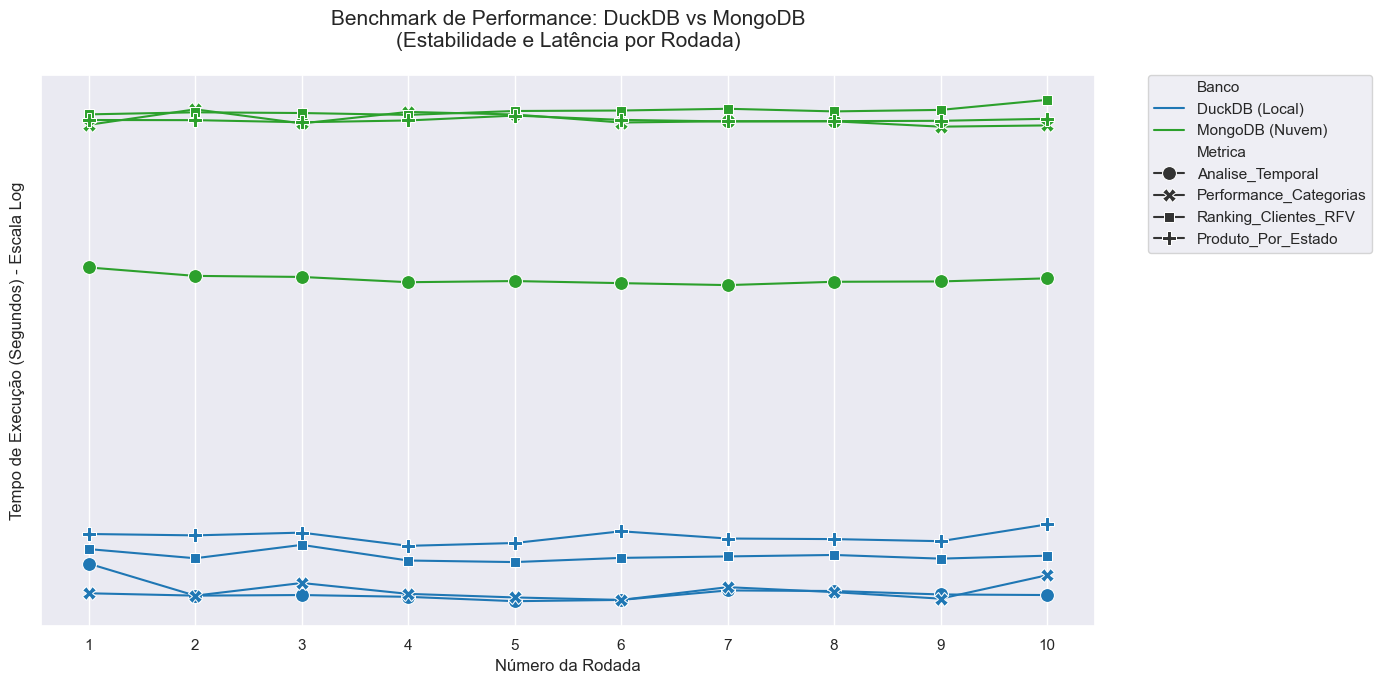

In [34]:


plt.figure(figsize=(14, 7))
sns.set_theme(style='darkgrid')

# Cores sugeridas (Azul para DuckDB, Verde para MongoDB)
palette = {'DuckDB (Local)': '#1f77b4', 'MongoDB (Nuvem)': '#2ca02c'}

# 3. Plotagem
ax = sns.lineplot(
    data=df_plot, 
    x='Rodada', 
    y='Tempo', 
    hue='Banco', 
    style='Metrica', 
    markers=True, 
    dashes=False,
    palette=palette,
    linewidth=1.5,
    markersize=10
)

ax.set_yscale('log') 
plt.title('Benchmark de Performance: DuckDB vs MongoDB\n(Estabilidade e Latência por Rodada)', fontsize=15, pad=20)
plt.ylabel('Tempo de Execução (Segundos) - Escala Log', fontsize=12)
plt.xlabel('Número da Rodada', fontsize=12)
plt.xticks(range(1, 11))
plt.yticks([])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


## Barplot

In [35]:
def calcular_stats(df,nome_banco):
    stats = pd.DataFrame({
        'mean' : df.mean(),
        'std' : df.std(),
        'var' : df.var(),
        'coef. var(%)' : (df.std() / df.mean()) * 100
    })
    stats['Banco'] = nome_banco
    return stats

In [36]:
stats_duck = calcular_stats(df_duck,'DuckDB (Local)')
stats_mongo = calcular_stats(df_mongo, 'MongoDB (Nuvem)')

In [37]:
comparativo_estatistico = pd.concat([stats_duck, stats_mongo])
print(comparativo_estatistico)

                           mean       std       var  coef. var(%)  \
Analise_Temporal        0.01409  0.002151  0.000005     15.267574   
Performance_Categorias  0.01415  0.001436  0.000002     10.150087   
Ranking_Clientes_RFV    0.02210  0.001491  0.000002      6.745303   
Produto_Por_Estado      0.02817  0.002260  0.000005      8.022073   
Analise_Temporal        0.70522  0.046293  0.002143      6.564304   
Performance_Categorias  5.18493  0.401887  0.161513      7.751058   
Ranking_Clientes_RFV    5.83287  0.323373  0.104570      5.543980   
Produto_Por_Estado      5.17677  0.120685  0.014565      2.331278   

                                  Banco  
Analise_Temporal         DuckDB (Local)  
Performance_Categorias   DuckDB (Local)  
Ranking_Clientes_RFV     DuckDB (Local)  
Produto_Por_Estado       DuckDB (Local)  
Analise_Temporal        MongoDB (Nuvem)  
Performance_Categorias  MongoDB (Nuvem)  
Ranking_Clientes_RFV    MongoDB (Nuvem)  
Produto_Por_Estado      MongoDB (Nuvem)  


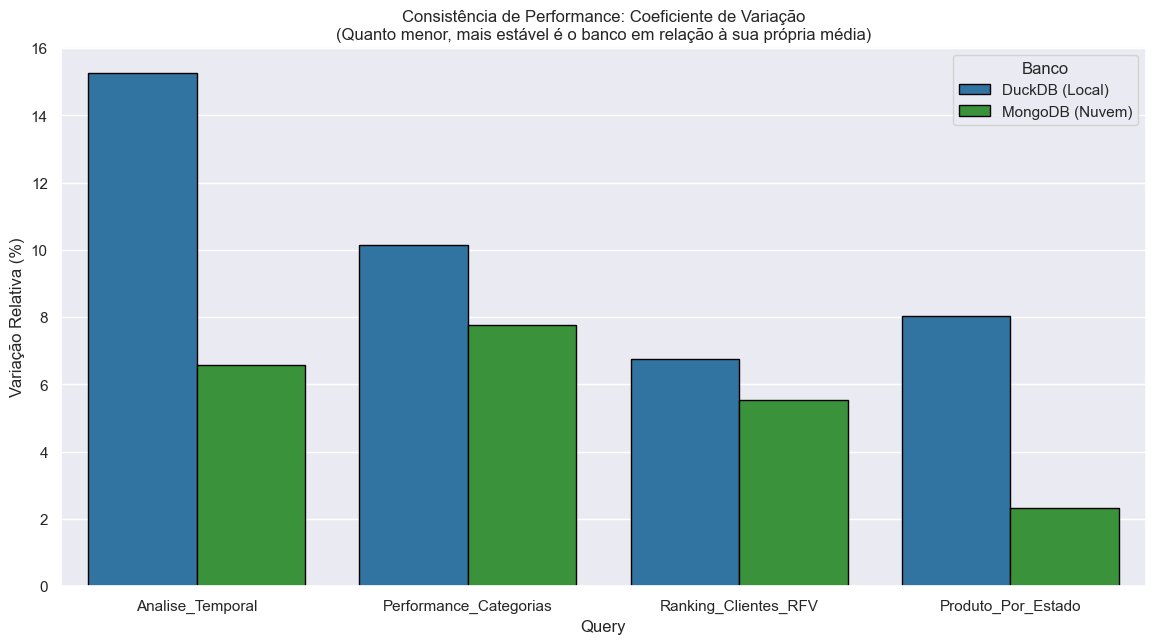

In [38]:
plt.figure(figsize=(14,7))
palette = {'DuckDB (Local)': '#1f77b4', 'MongoDB (Nuvem)': '#2ca02c'}
sns.barplot(
    data=comparativo_estatistico.reset_index(),
    x='index',
    y='coef. var(%)', 
    hue='Banco',
    palette=palette,
    edgecolor='black'
)
plt.title('Consistência de Performance: Coeficiente de Variação\n(Quanto menor, mais estável é o banco em relação à sua própria média)')
plt.ylabel('Variação Relativa (%)')
plt.xlabel('Query')
plt.show()

Embora o MongoDB apresente coeficientes de variação relativamente baixos em determinadas consultas, seus tempos absolutos permanecem significativamente superiores, refletindo o custo arquitetural do ambiente distribuído.

## Boxplot

In [39]:
df_duck_long = df_duck.copy()
df_duck_long['Banco'] = 'DuckDB (Local)'

df_mongo_long = df_mongo.copy()
df_mongo_long['Banco'] = 'MongoDB (Nuvem)'

# Unindo e transformando em formato "longo" para o Seaborn
df_combined = pd.concat([df_duck_long, df_mongo_long])
df_melted = df_combined.melt(id_vars=['Banco'], var_name='Query', value_name='Tempo (s)')

In [40]:
df_melted

,Banco,Query,Tempo (s)
0,DuckDB (Local),Analise_Temporal,0.0200
1,DuckDB (Local),Analise_Temporal,0.0134
2,DuckDB (Local),Analise_Temporal,0.0135
3,DuckDB (Local),Analise_Temporal,0.0132
4,DuckDB (Local),Analise_Temporal,0.0125
...,...,...,...
75,MongoDB (Nuvem),Produto_Por_Estado,5.1867
76,MongoDB (Nuvem),Produto_Por_Estado,5.0857
77,MongoDB (Nuvem),Produto_Por_Estado,5.1070
78,MongoDB (Nuvem),Produto_Por_Estado,5.1256


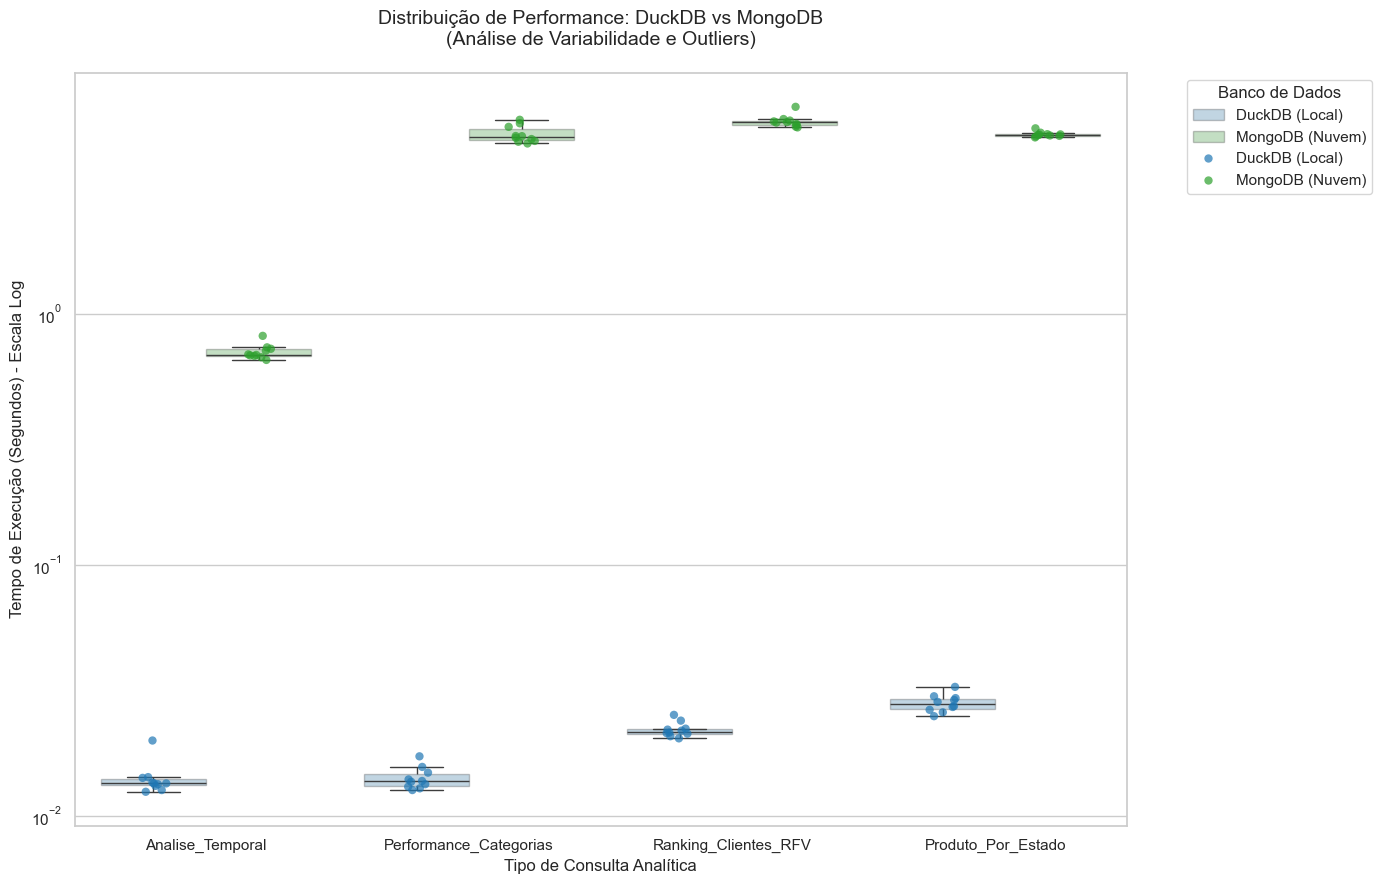

In [41]:
plt.figure(figsize=(14, 9))
sns.set_theme(style="whitegrid")
palette = {'DuckDB (Local)': '#1f77b4', 'MongoDB (Nuvem)': '#2ca02c'}
ax = sns.boxplot(
    data=df_melted, 
    x='Query', 
    y='Tempo (s)', 
    hue='Banco',
    palette=palette,
    boxprops=dict(alpha=0.3),
    showfliers=False
)

sns.stripplot(
    data=df_melted, 
    x='Query', y='Tempo (s)', hue='Banco',
    palette=palette,
    dodge=True, 
    jitter=True, 
    alpha=0.7,
    size=6,
    ax=ax
)

ax.set_yscale('log')

plt.title('Distribuição de Performance: DuckDB vs MongoDB\n(Análise de Variabilidade e Outliers)', fontsize=14, pad=20)
plt.ylabel('Tempo de Execução (Segundos) - Escala Log', fontsize=12)
plt.xlabel('Tipo de Consulta Analítica', fontsize=12)
plt.legend(title='Banco de Dados', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('boxplot_comparativo.png')
plt.show()

Observa-se que o DuckDB apresenta distribuições mais concentradas e menor dispersão, enquanto o MongoDB apresenta maior amplitude e presença de valores extremos, especialmente em consultas com múltiplas junções.

## Tabela Resumo

In [42]:
def count_outliers_iqr(series):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    return ((series < lower) | (series > upper)).sum()

In [43]:
df_melted

,Banco,Query,Tempo (s)
0,DuckDB (Local),Analise_Temporal,0.0200
1,DuckDB (Local),Analise_Temporal,0.0134
2,DuckDB (Local),Analise_Temporal,0.0135
3,DuckDB (Local),Analise_Temporal,0.0132
4,DuckDB (Local),Analise_Temporal,0.0125
...,...,...,...
75,MongoDB (Nuvem),Produto_Por_Estado,5.1867
76,MongoDB (Nuvem),Produto_Por_Estado,5.0857
77,MongoDB (Nuvem),Produto_Por_Estado,5.1070
78,MongoDB (Nuvem),Produto_Por_Estado,5.1256


In [44]:
summary_table = (
    df_melted
    .groupby(["Banco", "Query"])
    .agg(
        mean_time=("Tempo (s)", "mean"),
        median_time=("Tempo (s)", "median"),
        std_time=("Tempo (s)", "std"),
        cv_time=("Tempo (s)", lambda x: x.std() / x.mean()),
        outliers=("Tempo (s)", count_outliers_iqr)
    )
    .reset_index()
)
summary_table[["mean_time", "median_time", "std_time", "cv_time"]] = (
    summary_table[["mean_time", "median_time", "std_time", "cv_time"]]
    .round(4)
)

In [45]:
summary_table

,Banco,Query,mean_time,median_time,std_time,cv_time,outliers
0,DuckDB (Local),Analise_Temporal,0.0141,0.0135,0.0022,0.1527,1
1,DuckDB (Local),Performance_Categorias,0.0142,0.0138,0.0014,0.1015,1
2,DuckDB (Local),Produto_Por_Estado,0.0282,0.0280,0.0023,0.0802,0
3,DuckDB (Local),Ranking_Clientes_RFV,0.0221,0.0217,0.0015,0.0675,2
4,MongoDB (Nuvem),Analise_Temporal,0.7052,0.6872,0.0463,0.0656,1
5,MongoDB (Nuvem),Performance_Categorias,5.1849,5.0556,0.4019,0.0775,0
6,MongoDB (Nuvem),Produto_Por_Estado,5.1768,5.1589,0.1207,0.0233,1
7,MongoDB (Nuvem),Ranking_Clientes_RFV,5.8329,5.7824,0.3234,0.0554,1


In [46]:
latex_table = summary_table.to_latex(
    index=False,
    caption="Resumo estatístico das métricas OLAP por banco de dados e tipo de consulta",
    label="tab:resumo_olap",
    column_format="llrrrrr",
    float_format="%.4f"
)

with open("tabela_resumo_olap.tex", "w", encoding="utf-8") as f:
    f.write(latex_table)